In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np

import cv2
from skimage.feature import hog

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm

from random import randint
from random import seed

RANDOM_SEED = 100

Drive and file setup

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 # unzip file
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/train_images.zip')

In [ ]:
# unzip file
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Colab Notebooks/test_images.zip')

##Load image data sets

In [ ]:
data_train = ('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
data_test = ('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
# load training data
df_train = pd.read_csv(os.path.join(data_train))

# summarise the details
print(f'Number of entries: {len(df_train)}')
df_train.head()

Number of entries: 10000


,id,label
0,1,cat
1,2,dog
2,3,cat
3,4,cat
4,5,cat


In [ ]:
# load testing data
df_test = pd.read_csv(os.path.join(data_test))

# summarise the details
print(f'Number of entries: {len(df_test)}')
df_test.head()

Number of entries: 1000


,id
0,1
1,2
2,3
3,4
4,5


<AxesSubplot:xlabel='label', ylabel='count'>

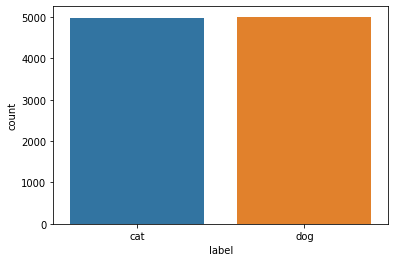

In [ ]:
# Summarise label details in training data
sns.countplot(x=df_train['label'])

Let's write a function to load images.

In [ ]:
# parameters
# ids - list of image ids
# folder_path - path to image folder
# dim - dimensions to resize images
def load_images(ids, folder_path, dim):
  images = []
  for id in ids:
    image_path = os.path.join(folder_path, f'{id}.jpg')
    img = cv2.imread(image_path)

    # Resize if necessary
    if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
      img = cv2.resize(img, dim)
    images.append(img)
  return images

In [ ]:
base_dim = (200, 200)

# load train images
train_image_folder = os.path.join('train_images')
train_images = load_images(df_train['id'][0:7000], train_image_folder, base_dim)
print(f'Number of training images loaded: {len(train_images)}')

# load test images
test_image_folder = os.path.join('test_images')
test_images = load_images(df_test['id'], test_image_folder, base_dim)
print(f'Number of testing images loaded: {len(test_images)}')

Number of training images loaded: 7000
Number of testing images loaded: 1000


## Feature extraction and model generation

In [ ]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['0', '1']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions)
  return accuracy, confusion_matrix

### SVM

In [ ]:
def build_svm_model(X_train, X_val, y_train, y_val):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)
  return clf

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def build_knn_model(X_train, X_val, y_train, y_val):
  # build model
  clf = KNeighborsClassifier(n_neighbors=3) 
  clf.fit(X_train, y_train)
  return clf

#### Model M2

- Preprocessing - gray scaling, smoothing <br>
- Features - image vector<br>
- Algorithm - SVM <br>

To smooth images, we learned 2 commonly used techniques: box filtering and Gaussian filtering. Among them Gaussian filtering is used with this example.

This code selects a random sample of images from the "train_images" list and applies some image preprocessing techniques to them, displaying the results.

The first line sets the random seed for the numpy.random module to the value of the "RANDOM_SEED" variable.

The next block of code selects a random sample of 5 images from the "train_images" list using a for loop and the numpy.random.randint() function. For each image, it prints the image ID and appends the corresponding image object to the "sample_images" list.

The final block of code applies some preprocessing techniques to each image in the "sample_images" list and displays the results using matplotlib.pyplot.imshow() and matplotlib.pyplot.show() functions. Specifically, it converts each image to grayscale using cv2.cvtColor() with the COLOR_BGR2GRAY conversion flag, and then applies a Gaussian blur using cv2.GaussianBlur() with a kernel size of (3, 3) and a standard deviation of 2. It then displays the original and blurred images using imshow() and show().

Overall, this code provides a way to visualize a random sample of images from the training set and apply some basic preprocessing techniques to them. This can be useful for gaining an understanding of the characteristics of the images and determining which preprocessing techniques may be appropriate for improving the performance of a machine learning model.

Image Id: 1193
Image Id: 3764
Image Id: 3726
Image Id: 6314
Image Id: 1431


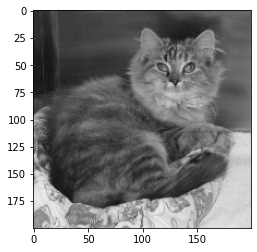

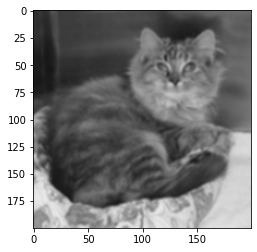

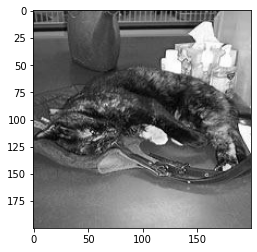

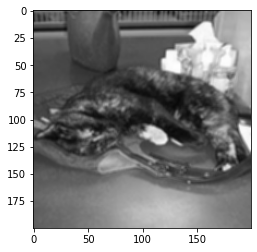

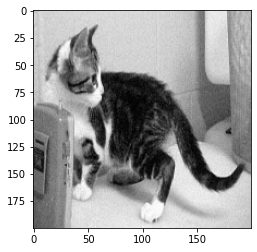

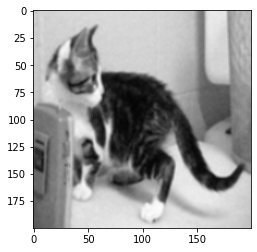

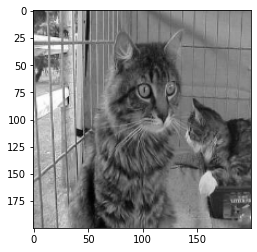

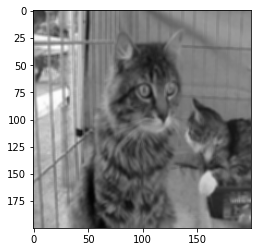

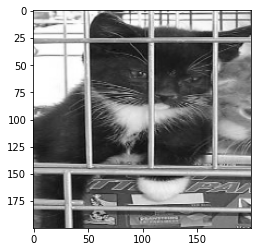

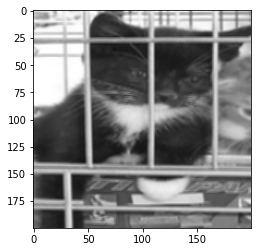

In [ ]:
seed(RANDOM_SEED)
sample_images = []

# pick random sample of images
for i in range(5):
  value = randint(0, len(train_images)-1)
  print(f'Image Id: {value}')
  sample_images.append(train_images[value])

# apply preprocessing and show output images
for img in sample_images:
  img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB))
  plt.show()

  img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)
  plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
  plt.show()

This code defines a function named "get_features_m2" that takes a list of images as input, applies some preprocessing and feature extraction techniques to each image, and returns a numpy array containing the resulting feature vectors.

The function first initializes an empty list named "features_list" to store the feature vectors.

It then iterates over each image in the input "images" list using a for loop. For each image, it applies two preprocessing techniques:

1. Convert the image to grayscale using cv2.cvtColor() with the COLOR_BGR2GRAY conversion flag.
2. Apply a Gaussian blur to the grayscale image using cv2.GaussianBlur() with a kernel size of (3, 3) and a standard deviation of 2.
After preprocessing, the function extracts features from the preprocessed image by flattening the pixel values into a one-dimensional array using the numpy.flatten() function. The resulting feature vector is then appended to the "features_list" list.

Finally, the function converts the "features_list" to a numpy array using np.array() and returns the resulting array.

Overall, this function provides a way to preprocess and extract features from a list of images using grayscale conversion and Gaussian blur, which can be useful for preparing image data for use in machine learning models.

In [ ]:
# method to get image features
def get_features_m2(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)

    # vectorise/ feature extraction
    features = img_blurred.flatten()

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

Train and validate model

In [ ]:
# feature extraction
features_train = get_features_m2(train_images)
print(features_train.shape)

(7000, 40000)


In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'][0:7000], test_size=0.3, random_state=RANDOM_SEED)

# train model
m2 = build_knn_model(X_train, X_val, y_train, y_val)

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'][0:7000], test_size=0.3, random_state=RANDOM_SEED)

# train model
m2 = build_svm_model(X_train, X_val, y_train, y_val)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.5414285714285715


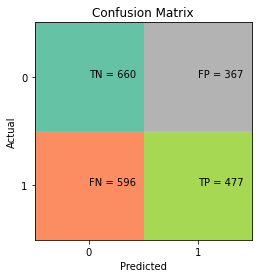

In [ ]:
# make predictions on validation data
y_pred = m2.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)

Make predictions on test images

In [ ]:
# feature extraction - test data
features_test = get_features_m2(test_images)
print(features_test.shape)

# get model predictions
predictions = m2.predict(features_test)

print(predictions)

(1000, 40000)
['cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'dog'
 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog'
 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'dog'
 'cat' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat'
 'dog' 'cat' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog'
 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat'
 'cat' 'cat' 'dog' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog' 'dog' 'dog' 'dog' 'cat'
 'dog' 'cat' 'cat' 'dog' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'cat'
 'dog' 'cat' 'cat' 'dog' 'cat' 'cat' 'dog' 'cat' 'dog' 'cat' 'cat' 'dog'
 'dog' 'dog' 'dog' 'cat' 'cat' 'dog' 

In [ ]:
import pandas as pd

# Create an array
arr = predictions

# Convert the array into a pandas DataFrame
df = pd.DataFrame(arr, columns=['predictions'])

print(df)

In [ ]:
id_add = df_test

In [ ]:
final=pd.concat([df, id_add], axis=1)

In [ ]:
final.to_csv('submission.csv')

In [ ]:
final.head(10)

In [ ]:
fin_ren = final.rename(columns={'predictions': 'prediction'})

In [ ]:
import json

import pandas as pd

df_test = fin_ren[["id", "prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))
